# Data analysis

In this notebook, we will perform data visualization based on questions from Task 3 from project description.

First, we need to import necessary libraries.

In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

Then, we need to connect to our database.

In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="psz",
    password="psz2021",
    database='real_estate_db'
)

### Function definitions

In [3]:
def most_popular_districts_bar():
    query = """select district, count(*) as cnt from real_estate where city = 'Beograd' group by district order by cnt desc limit 0, 10"""
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    counts = list()
    districts = list()
    for d in data:
        counts.append(d[1])
        districts.append(d[0])

    bars = plt.bar(range(1, len(counts) + 1), counts, align='center')
    # plt.xticks(range(1, len(counts) + 1), districts, rotation=45)
    plt.xticks(range(1, len(counts) + 1), districts, fontsize=6, rotation=30)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, str(yval), ha='center', va='bottom')

    plt.title('Najzastupljeniji delovi Beograda')
    plt.xlabel('Deo grada')
    plt.ylabel('Broj nekretnina')
    plt.show()


def most_popular_districts_pie():
    query = """select district, count(*) as cnt from real_estate where city = 'Beograd' group by district order by cnt desc limit 0, 10"""
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    counts = list()
    districts = list()
    for d in data:
        counts.append(d[1])
        districts.append(d[0])
    query = """select count(*) from real_estate where city = 'Beograd'"""
    cursor.execute(query)
    data = cursor.fetchall()
    counts.append(data[0][0] - sum(counts))
    districts.append('Ostalo')
    # colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#fefebe', '#e0bbe4', '#acddde', '#ccaeb0', '#039684', '#b9ebff', '#c6c5cb']
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#fefebe', '#e0bbe4', '#acddde', '#ccaeb0', '#811970', '#b9ebff', '#c6c5cb']
    explode = (0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0)
    patches, texts, autotexts = plt.pie(counts, autopct='%1.1f%%', pctdistance=1.1, shadow=True, colors=colors, explode=explode)

    for text in texts:
        text.set_color('grey')
    for autotext in autotexts:
        autotext.set_color('grey')

    for i in range(len(districts)):
        districts[i] += ' - ' + str(counts[i])

    plt.legend(districts, loc='right', bbox_to_anchor=(-0.1, 1.), fontsize=8)

    # text = plt.title('Najzastupljeniji delovi Beograda')
    text.set_color('grey')
    plt.show()

In [4]:
def apartments_by_size_range():
    ranges = ["<= 35", "36-50", "51-65", "66-80", "81-95", "96-110", ">=111"]
    counts = list()
    cursor = conn.cursor()

    query = """select count(*) from real_estate where estate_type = 'stan' and offer_type = 'prodaja' and size <= 35"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where estate_type = 'stan' and offer_type = 'prodaja' and size between 36 and 50"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where estate_type = 'stan' and offer_type = 'prodaja' and size between 51 and 65"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where estate_type = 'stan' and offer_type = 'prodaja' and size between 66 and 80"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where estate_type = 'stan' and offer_type = 'prodaja' and size between 81 and 95"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where estate_type = 'stan' and offer_type = 'prodaja' and size between 96 and 110"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where estate_type = 'stan' and offer_type = 'prodaja' and size >= 111"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    bars = plt.bar(range(1, len(counts) + 1), counts, align='center')
    # plt.xticks(range(1, len(counts) + 1), ranges, rotation=45)
    plt.xticks(range(1, len(counts) + 1), ranges, fontsize=7)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, str(yval), ha='center', va='bottom')

    plt.title('Stanovi za prodaju prema kvadraturi (Srbija)')
    plt.xlabel('Kvadratura')
    plt.ylabel('Broj stanova')
    plt.show()

In [5]:
def estates_by_decade():
    ranges = ["1951-1960", "1961-1970", "1971-1980", "1981-1990", "1991-2000", "2001-2010", "2011-2020"]
    counts = list()
    cursor = conn.cursor()

    query = """select count(*) from real_estate where year between 1951 and 1960"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where year between 1961 and 1970"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where year between 1971 and 1980"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where year between 1981 and 1990"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where year between 1991 and 2000"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where year between 2001 and 2010"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where year between 2011 and 2020"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    bars = plt.bar(range(1, len(counts) + 1), counts, align='center')
    # plt.xticks(range(1, len(counts) + 1), ranges, rotation=45)
    plt.xticks(range(1, len(counts) + 1), ranges, fontsize=7)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, str(yval), ha='center', va='bottom')

    plt.title('Broj izgradjenih nekretnina po dekadama')
    plt.xlabel('Dekada')
    plt.ylabel('Broj nekretnina')
    plt.show()

In [6]:
def for_sale_for_rent_ratio():
    cursor = conn.cursor()
    query = """select C.city, coalesce(T.cnt, 0) from (select city, count(*) as cnt from real_estate group by city order by cnt desc limit 0, 6) as C
            left join (select city, count(*) as cnt from real_estate where offer_type = 'prodaja' group by city) as T
            on C.city = T.city"""
    cursor.execute(query)
    data = cursor.fetchall()
    cities = list()
    sale_cnt = list()
    rent_cnt = list()
    for d in data:
        cities.append(d[0])
        sale_cnt.append(d[1])

    query = """select C.city, coalesce(T.cnt, 0) from (select city, count(*) as cnt from real_estate group by city order by cnt desc limit 0, 6) as C
            left join (select city, count(*) as cnt from real_estate where offer_type = 'iznajmljivanje' group by city) as T
            on C.city = T.city"""
    cursor.execute(query)
    data = cursor.fetchall()
    for d in data:
        rent_cnt.append(d[1])

    cities = cities[:len(cities) - 1]
    sale_cnt = sale_cnt[:len(sale_cnt) - 1]
    rent_cnt = rent_cnt[:len(rent_cnt) - 1]
    total_cnt = [x + y for x, y in zip(sale_cnt, rent_cnt)]

    fix, ax = plt.subplots()
    x = np.arange(5)
    width = 1.0 / 5
    bars = ax.bar(x + 0 * width, sale_cnt, width, label='Prodaja')
    for bar in bars:
        yval = bar.get_height()
        i = bars.index(bar)
        text = str(yval) + ' (' + '{:.1f}%'.format(100 * yval / total_cnt[i]) + ')'
        plt.text(bar.get_x() + 0.02, yval + 0.2, text, ha='left', va='bottom')
    bars = ax.bar(x + 1 * width, rent_cnt, width, label='Iznajmljivanje')
    for bar in bars:
        yval = bar.get_height()
        i = bars.index(bar)
        text = str(yval) + ' (' + '{:.1f}%'.format(100 * yval / total_cnt[i]) + ')'
        plt.text(bar.get_x() + 0.02, yval + 0.2, text, ha='left', va='bottom')
    plt.xticks(x + width / 2, cities, rotation=45)
    ax.legend()

    plt.title('Broj nekretnina koje se prodaju i izdaju po gradovima')
    plt.xlabel('Grad')
    plt.ylabel('Broj nekretnina')
    plt.show()

In [7]:
def estates_by_price_range_bar():
    ranges = ["<= 49999", "50000-99999", "100000-149999", "150000-199999", ">= 200000"]
    counts = list()
    cursor = conn.cursor()

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price <= 49999"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price between 50000 and 99999"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price between 100000 and 149999"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price between 150000 and 199999"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price >= 200000"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    total = sum(counts)
    bars = plt.bar(range(1, len(counts) + 1), counts, align='center')
    # plt.xticks(range(1, len(counts) + 1), ranges, rotation=45)
    plt.xticks(range(1, len(counts) + 1), ranges, fontsize=7)
    for bar in bars:
        yval = bar.get_height()
        percentage = '{:.1f}%'.format(100 * yval / total)
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, percentage, ha='center', va='bottom')
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval / 2, yval, ha='center', va='bottom', color='white')

    plt.title('Broj nekretnina za prodaju po cenovnom opsegu')
    plt.xlabel('Cenovni opseg')
    plt.ylabel('Broj nekretnina')
    plt.show()


def estates_by_price_range_pie():
    ranges = ["<= 49999", "50000-99999", "100000-149999", "150000-199999", ">= 200000"]
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#fefebe']
    counts = list()
    cursor = conn.cursor()

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price <= 49999"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price between 50000 and 99999"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price between 100000 and 149999"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price between 150000 and 199999"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])

    query = """select count(*) from real_estate where offer_type = 'prodaja' and price >= 200000"""
    cursor.execute(query)
    data = cursor.fetchone()
    counts.append(data[0])
    # plt.pie(counts, labels=counts, autopct='%1.1f%%', pctdistance=0.8)
    patches, texts, autotexts = plt.pie(counts, autopct='%1.1f%%', colors=colors, shadow=True, labels=ranges)

    for text in texts:
        text.set_color('grey')
    for autotext in autotexts:
        autotext.set_color('grey')

    for i in range(len(ranges)):
        # ranges[i] = '{:<20} {:>10}'.format(ranges[i], counts[i])
        ranges[i] += ' (' + str(counts[i]) + ')'

    plt.legend(ranges, loc='right', bbox_to_anchor=(-0.1, 1.), fontsize=8)
    text = plt.title('Broj nekretnina za prodaju po cenovnom opsegu')
    text.set_color('grey')
    plt.show()

In [8]:
def estates_with_parking():
    cursor = conn.cursor()
    query = """select count(*) from real_estate where offer_type = 'prodaja' and city = 'Beograd' and parking = 'da' """
    cursor.execute(query)
    data = cursor.fetchall()
    with_parking = data[0][0]
    query = """select count(*) from real_estate where offer_type = 'prodaja' and city = 'Beograd'"""
    cursor.execute(query)
    data = cursor.fetchall()
    total = data[0][0]

    categories = ['Sa parkingom', 'Bez parkinga']
    values = [with_parking, total - with_parking]
    colors = ['#99ff99', '#ffcc99']
    explode = (0.1, 0)
    patches, texts, autotexts = plt.pie(values, autopct='%1.1f%%', colors=colors, shadow=True, labels=categories, explode=explode)

    for text in texts:
        text.set_color('grey')
    for autotext in autotexts:
        autotext.set_color('grey')

    # categories[0] += '{:>10}'.format(str(with_parking))
    # categories[1] += '{:>10}'.format(str(total - with_parking))
    categories[0] += ' (' + str(with_parking) + ')'
    categories[1] += ' (' + str(total - with_parking) + ')'
    plt.legend(categories, loc='right', bbox_to_anchor=(-0.1, 1.), fontsize=8)
    text = plt.title('Broj nekretnina za prodaju sa parkingom (Beograd)')
    text.set_color('grey')
    plt.show()

### 10 najzastupljenijih delova Beograda koji imaju najveci broj nekretnina u ponudi (i u sekciji za prodaju, i u sekciji za iznajmljivanje, zbirno)

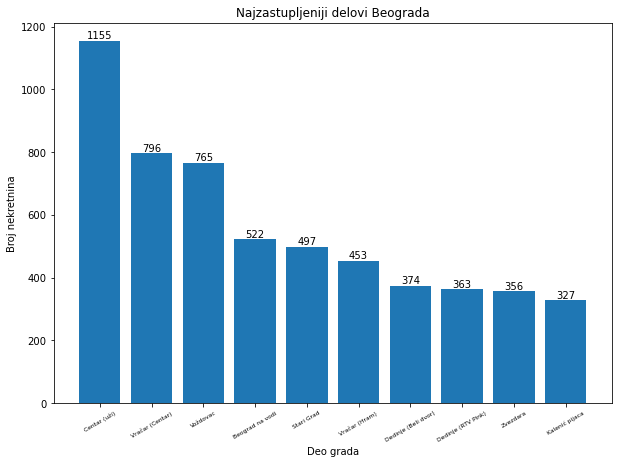

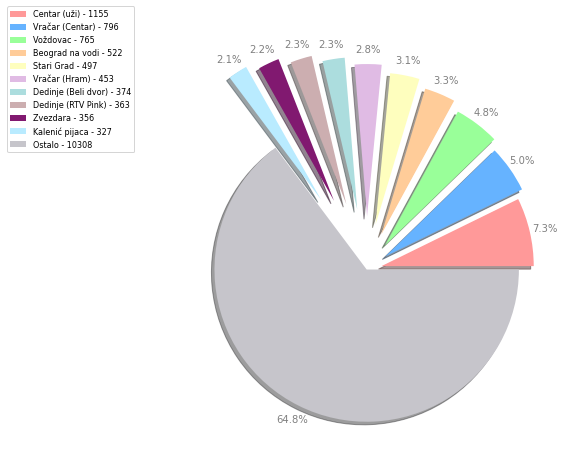

In [9]:
plt.figure(figsize=(10,7))
most_popular_districts_bar()
plt.figure(figsize=(10,7))
most_popular_districts_pie()

### Broj stanova za prodaju prema kvadraturi, u celoj Srbiji

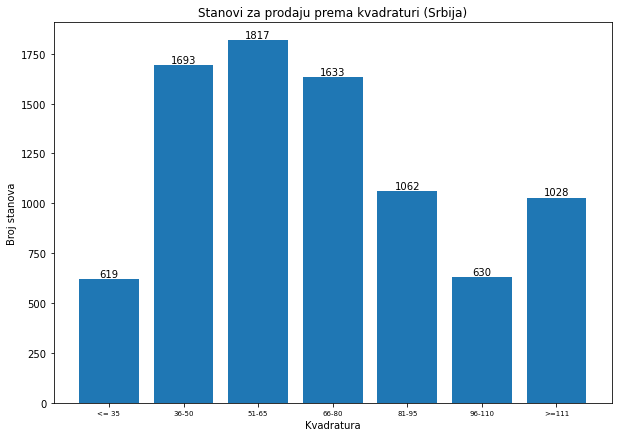

In [10]:
plt.figure(figsize=(10,7))
apartments_by_size_range()

### Broj izgradjenih nekretnina po dekadama, a obuhvatiti i sekcije za prodaju i za iznajmljivanje

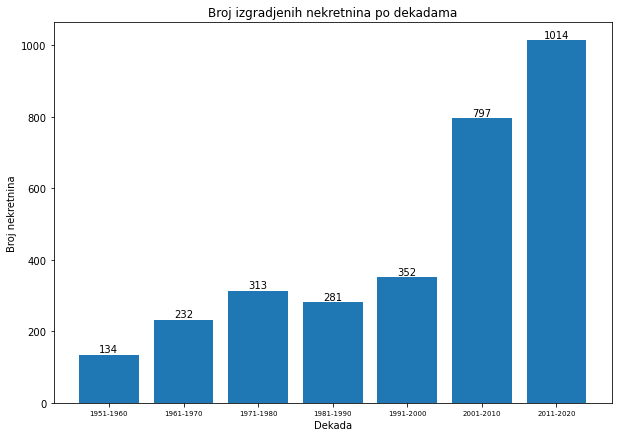

In [11]:
plt.figure(figsize=(10,7))
estates_by_decade()

### Broj (i procentualni odnos) nekretnina koje se prodaju i nekretnina koje se iznajmljuju, za prvih 5 gradova sa najvecim brojem nekretnina

<Figure size 720x504 with 0 Axes>

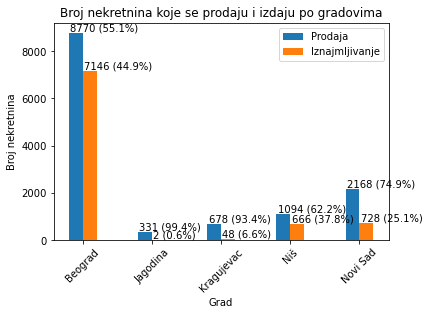

In [12]:
plt.figure(figsize=(10,7))
for_sale_for_rent_ratio()

### Broj (i procentualni odnos) svih nekretnina za prodaju po cenovnom opsegu

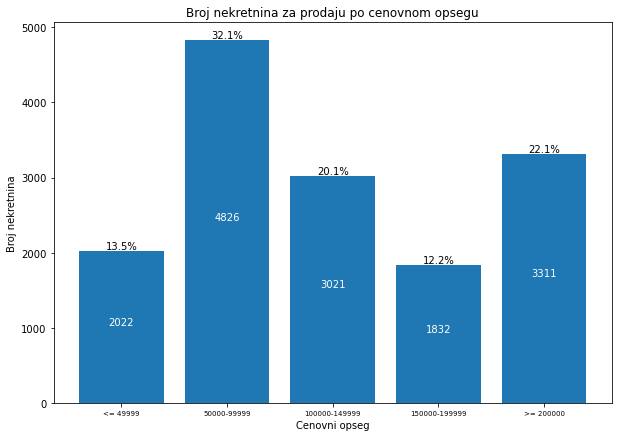

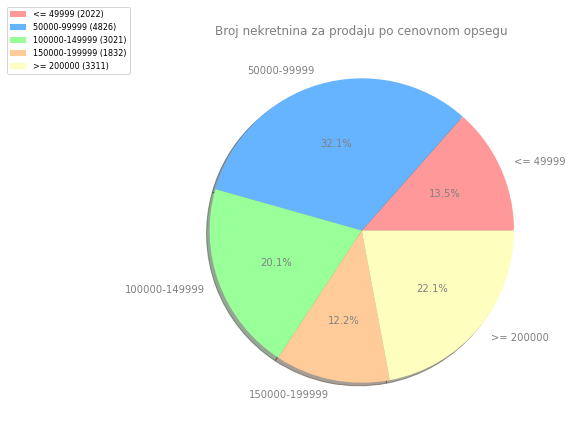

In [13]:
plt.figure(figsize=(10,7))
estates_by_price_range_bar()
plt.figure(figsize=(10,7))
estates_by_price_range_pie()

### Broj nekretnina za prodaju koje imaju parking, u odnosu na ukupan broj nekretnina za prodaju (samo za Beograd)

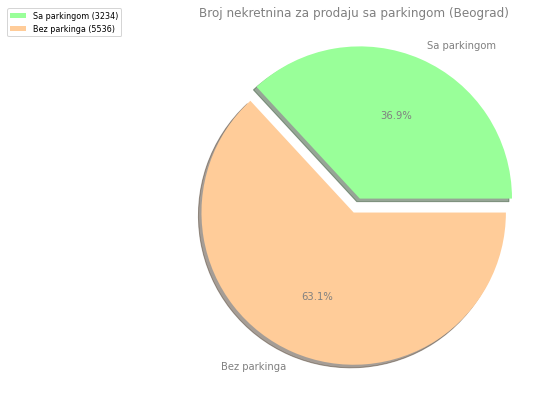

In [14]:
plt.figure(figsize=(10,7))
estates_with_parking()